# Esercizi - Calcolo approssimato di integrali e trasformate

- esercizio: calcolo ordine di convergenza per fromula di Simpson e BDF. 

- esempio riconoscimento tre note con DFT.

Trovate il file '.wav' utilizzato in 'Materiali per gli studenti del MOOC', accessibile dall'indice del corso. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## 1. Ordine di convergenza

Costruiamo degli esempi di integrali noti ed andiamo a calcolare l'ordine di convergenza di qualche formula di integrazione numerica.  
Vediamo in funzione l'esempio n.1:

In [3]:
# data f(x):
esempio = 1
if esempio == 1:
    f = lambda x: np.sin(x)
elif esempio == 2:
    f = lambda x: x**2
elif esempio == 3:
    f = lambda x: x**3
#endif

# voglio calcolarne numericamente l'integrale da 0 a pi e valutare l'ordine di convergenza del metodo dei trapezi,
# sapendo che il valore esatto dell'integrale in questione è pari a -cos(pi) - (-cos(0)) = 1 + 1 = 2
if esempio == 1:
    true_vali = 2.0
elif esempio == 2:
    true_vali = np.pi**3/3.0
elif esempio == 3:
    true_vali = np.pi**4/4.0
#endif

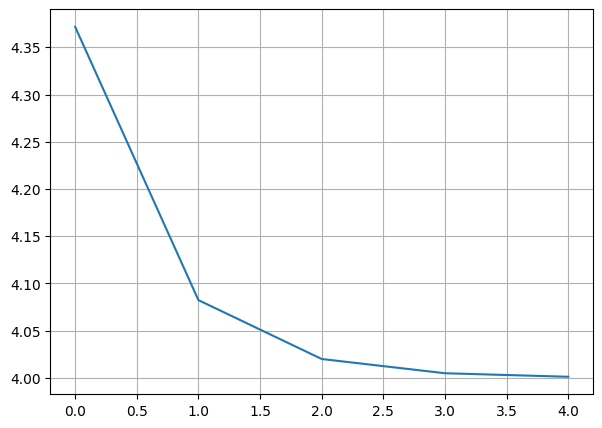

In [4]:
# grafico di f:
dx = 0.01
x = np.arange(0.0,np.pi+dx/2.0,dx)
# decido un passo di discretizzazione iniziale:
h = np.pi / 2.0
# ora calcolo l'errore di approssimazione dell'integrale, per dfferenti valori di h: h, h/2, h/4, ...
ne = 6 #23
erri = np.zeros(ne)
for s in range(ne):    
    # insieme di punti di interpolazione:
    xint = np.arange(0.0,np.pi+h/2,h)
    nint = len(xint)
    # calcolo l'interpolante nei punti xint con il metodo di Simpson:
    yint = f(xint)
    
    # valore e errore, nell'ipotesi che f >= 0 nell'intervallo di itegrazione:
    vali = integrate.simpson(yint,xint)
    erri[s] =  abs(vali - true_vali)
    
    # nuovo raffinamento
    h = h / 2.0
#endfor


q = np.log(erri[0:ne-1] / erri[1:ne]) / np.log(2.0)
plt.figure(figsize=(7,5))
plt.plot(q)
plt.grid()

## 2. Trasformata di Fourier Discreta (DFT)

Come esercizio sulle trasformate, andiamo ad analizzare un segnale audio corrispondente a tre note suonate al pianoforte:

fc =  44100
istart =  50000


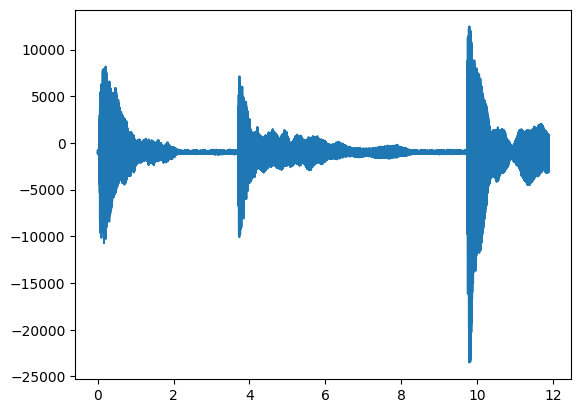

In [5]:
from scipy.io import wavfile

fc,ytot = wavfile.read('1.18 pianoforte_3.wav')  # note "staccate"
istart = 50000
N = 65536*8  # numero di campioni del segnale campionato a 44.1 KHz
a = 128*8  # passo di campionamento nel tempo
b = 32*2  # passo di campionamento in frequenza
print("fc = ", fc)
print("istart = ", istart)
y = ytot[istart+np.arange(N),:]
#wavfile.play(y, fc)
y = y[:,0] 
plt.figure(1); plt.plot(np.arange(float(N))/fc, y); plt.show()

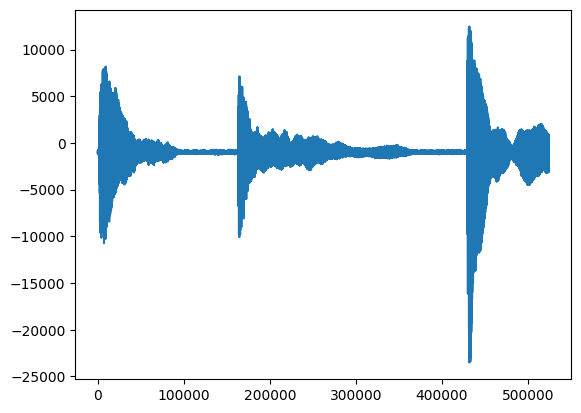

df =  2.205  [Hz]


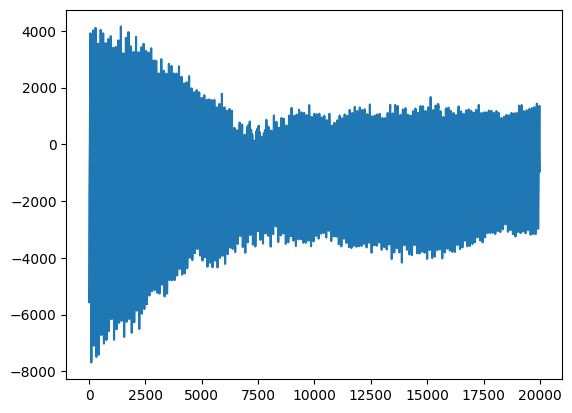

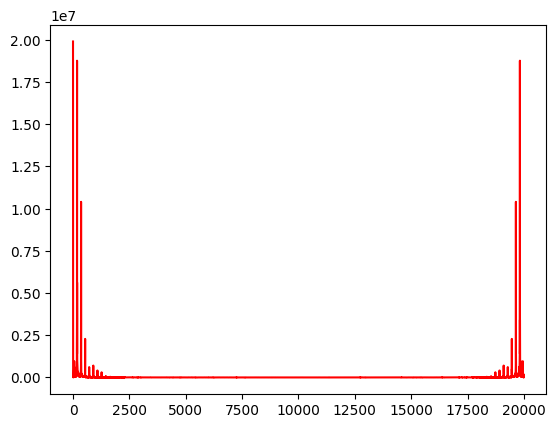

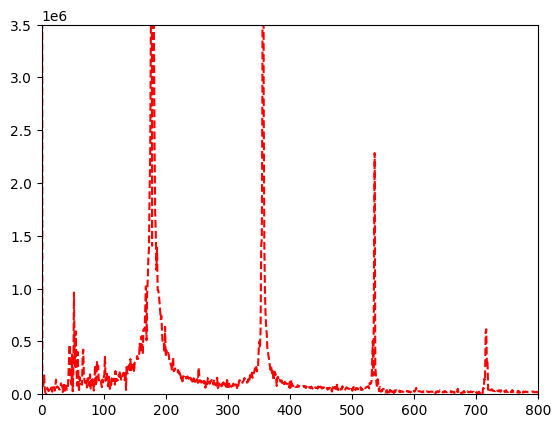


Nel grafico si vedono chiaramente la fondamentale e le armoniche. Provare ad individuare le tre note suonate ...



In [7]:
plt.figure(11); plt.plot(y); plt.show()
start1 = 450000; N1 = 20000; y1 = y[start1:start1+N1]
print("df = ",fc/N1, " [Hz]")
plt.figure(12); plt.plot(y1); plt.show()
Y1 = np.fft.fft(y1)
plt.figure(13); plt.plot(np.abs(Y1),'r-'); plt.show()  
plt.figure(14); plt.axis([0., 800., 0., 3500000.]); plt.plot(np.abs(Y1[0:2000]),'r--'); plt.show()
print('''
Nel grafico si vedono chiaramente la fondamentale e le armoniche. Provare ad individuare le tre note suonate ...
''')